In [3]:
using DrWatson

@quickactivate "GRNEvoContingency"

projectname()

"GRNEvoContingency"

In [4]:
include(srcdir("TissueModel_ND.jl"))

include(srcdir("Evolution.jl"))
include(srcdir("FitnessFunctions.jl"))

include(srcdir("NetworkTopologies.jl"))
include(srcdir("Utility.jl"))

using Plots
using Random
using Parameters
using Printf
using DataFrames
using GraphRecipes
using JLD

In [5]:
example_networks = load(datadir("exp_pro/80-40-80_networks/examples.jld"))

Dict{String, Any} with 6 entries:
  "bistable"     => NaN
  "feed_forward" => [0.0 0.0 0.0 0.19495; 0.173532 0.0 0.0 0.0; 3.02262 -5.5322…
  "classical"    => [0.0 0.0 0.0 0.114353; -0.560775 0.359711 0.0 0.0; -0.07258…
  "frozen_osc"   => NaN
  "mutual_inh"   => [0.0 0.0 0.0 0.2454; 0.455819 0.0 -2.23319 0.0; 0.446651 -2…
  "overlap_dom"  => [0.0 0.0 -0.00379469 0.228214; 0.653415 0.0 0.0 0.0; -0.424…

In [66]:
function make_square(adj)
    vcat(adj,[0. 0. 0. 0.])
end

plot_list = []

for (topology,w) in example_networks
    if typeof(w) == Matrix{Float64}
        w = transpose(make_square(w))
        g = graphplot(w,names = ["A","B","C","M"],markercolor = [:red,:green,:yellow,:blue],edgelabel = round.(w,digits = 2),self_edge_size=0.2,markersize = 0.5,nodelabelsize = 1.,edgelabelsize = 10.,linecolor = :darkgrey,margin=25Plots.mm)
        title!(g,topology)
        push!(plot_list,g)
    end
end

In [68]:
example_networks["overlap_dom"]

3×4 Matrix{Float64}:
  0.0       0.0       -0.00379469  0.228214
  0.653415  0.0        0.0         0.0
 -0.424533  0.150029   0.0         0.0

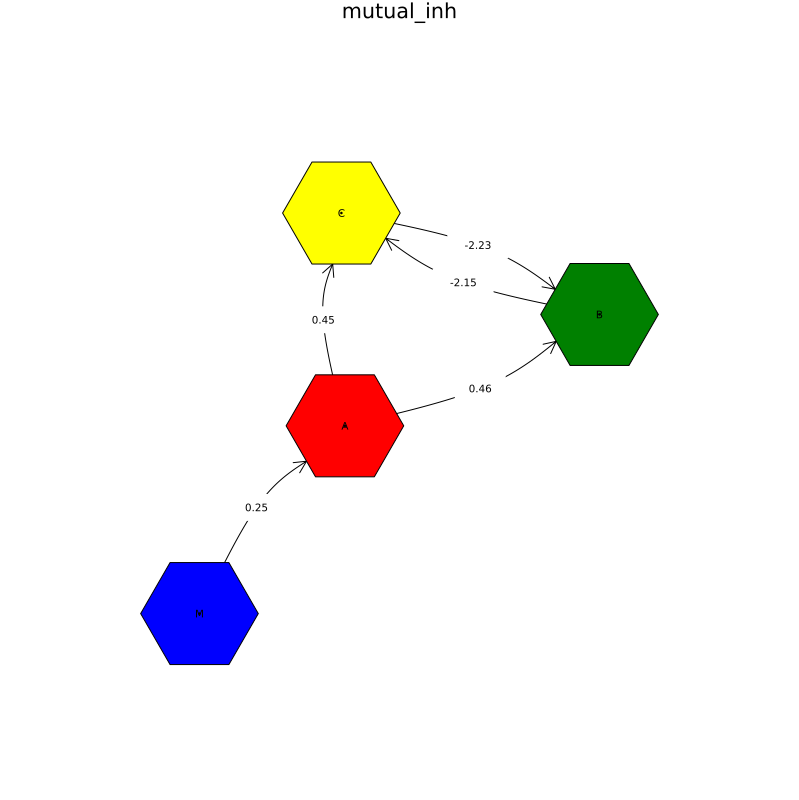

In [71]:
plot(plot_list[3], layout = (2,2), size = (800,800))

In [9]:
grn_parameters = DefaultGRNParameters()

GRNParameters([0.05, 0.05, 0.05], [0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01])

In [ ]:
grn_parameters = DefaultGRNParameters()

GRNParameters([0.05, 0.05, 0.05], [0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01; 0.01 0.01 … 0.01 0.01])

In [41]:
plot_list = []

for (topology,w) in example_networks
    if typeof(w) == Matrix{Float64}
        start_ind = Individual(w,grn_parameters,DefaultGRNSolver())
        g = plot(transpose(start_ind.phenotype.u[end]),xlabel = "Tissue",ylabel = "Concentration",label = ["Gene A" "Gene B" "Gene C"],color = [:red :green :yellow],legend = false,background_color=:lightgrey,thickness_scaling = 1.5,titlefontsize=10)
        plot!(map(x->morph(x),tissue),label = "Morphogen (steady state)",color = :blue)
        title!(g,topology)
        push!(plot_list,g)
    end
end


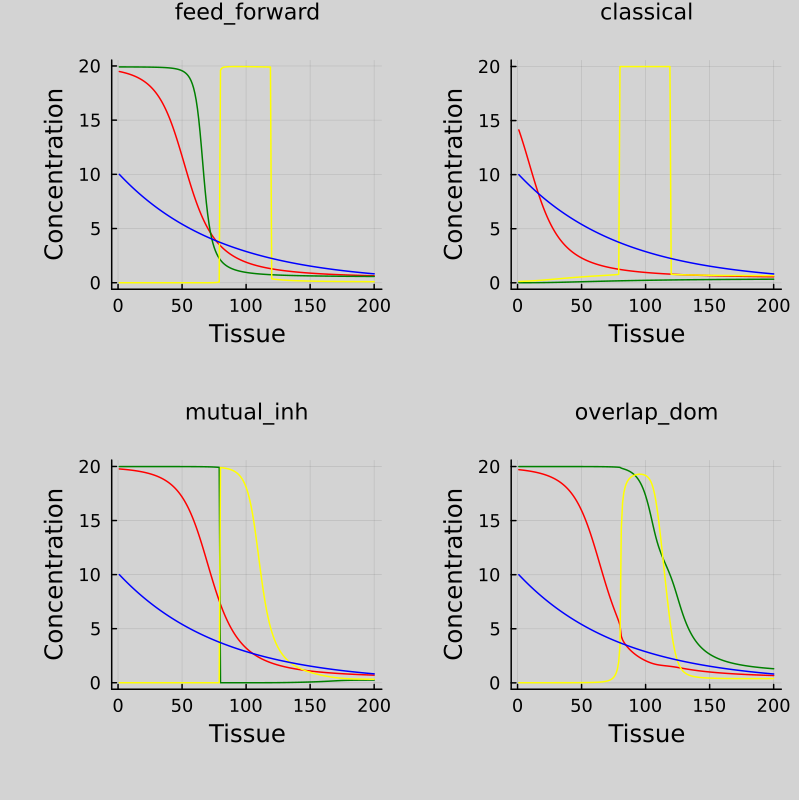

In [42]:
plot(plot_list..., layout = (2,2), size = (800,800))